In [1]:
#Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import PIL
from PIL import Image
import tensorflow as tf
import keras


C:\Users\lotrh\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv('data//birds.csv')
df['labels'].value_counts().head(15) # Printing the first 15 bird species selected for the analysis

RUFOUS TREPE             273
HOUSE FINCH              258
D-ARNAUDS BARBET         243
OVENBIRD                 243
ASIAN GREEN BEE EATER    230
SWINHOES PHEASANT        226
WOOD DUCK                224
CASPIAN TERN             223
RED BILLED TROPICBIRD    222
WOOD THRUSH              221
FRILL BACK PIGEON        219
PYRRHULOXIA              219
MERLIN                   219
ORNATE HAWK EAGLE        218
MILITARY MACAW           218
Name: labels, dtype: int64

In [3]:
def create_data(df, type_data):
    processed_data_directory = 'data/'
    data = []
    top_15 = df['labels'].value_counts().head(15).index.tolist()
    for c in top_15:
        image_folder = os.path.join(processed_data_directory + f'{type_data}/', c)
        for filename in os.listdir(image_folder):
            image_path = os.path.join(image_folder, filename)
            img = imread(image_path, as_gray=False)
            img = img / 255
            img = resize(img, (224, 224))
            class_value = top_15.index(c)
            data.append([img, class_value])
    return data

In [4]:
X_test = []
y_test = []
test_data = create_data(df, 'test')
for attr, lbl in test_data:
    X_test.append(attr)
    y_test.append(lbl)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [5]:
def append_label(df, type_data):
    top_15 = df['labels'].value_counts().head(15).index.tolist()
    label_dict = {}
    for idx, c in enumerate(top_15):
        label_dict[idx] = c.title()
    return label_dict

labels = append_label(df, 'test')
labels

{0: 'Rufous Trepe',
 1: 'House Finch',
 2: 'D-Arnauds Barbet',
 3: 'Ovenbird',
 4: 'Asian Green Bee Eater',
 5: 'Swinhoes Pheasant',
 6: 'Wood Duck',
 7: 'Caspian Tern',
 8: 'Red Billed Tropicbird',
 9: 'Wood Thrush',
 10: 'Frill Back Pigeon',
 11: 'Pyrrhuloxia',
 12: 'Merlin',
 13: 'Ornate Hawk Eagle',
 14: 'Military Macaw'}

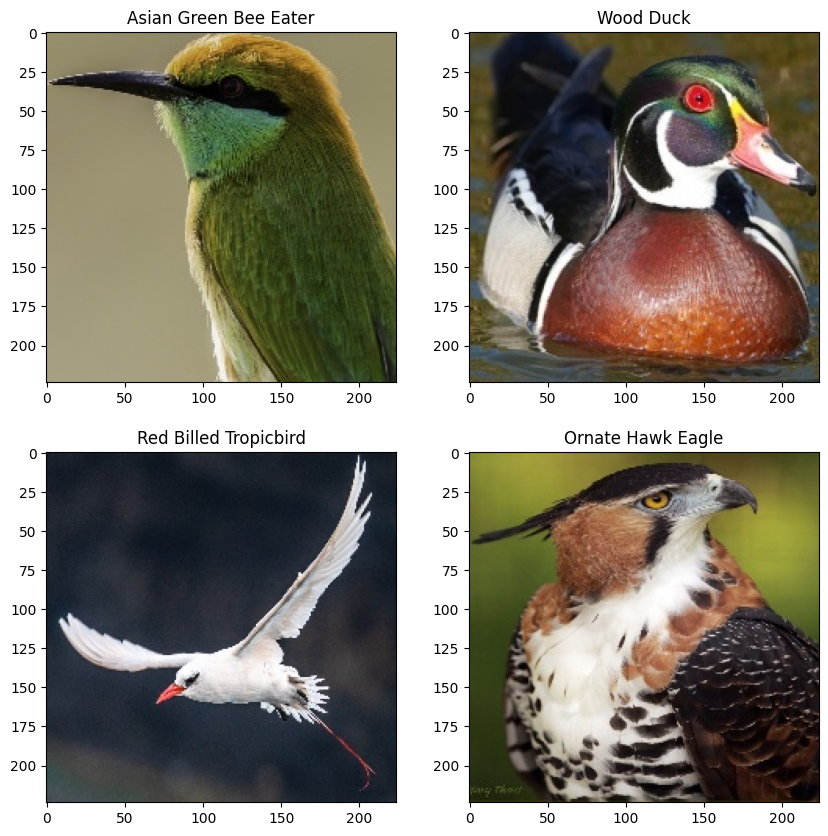

In [6]:
i = 23
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X_test[i]), plt.title(labels[int(y_test[i])])
plt.subplot(222), plt.imshow(X_test[i+10]), plt.title(labels[int(y_test[i+10])])
plt.subplot(223), plt.imshow(X_test[i+20]), plt.title(labels[int(y_test[i+20])])
plt.subplot(224), plt.imshow(X_test[i+45]), plt.title(labels[int(y_test[i+45])])
plt.show()

In [6]:
# Plot the probabilities with bird names and label indices
def probabilities_cnn(predicted_probabilities, preds):
    bird_info = [f"{label_id}: {bird_name}" for label_id, bird_name in labels.items()]
    plt.figure(figsize=(10, 6))
    plt.bar(bird_info, predicted_probabilities)
    plt.xlabel('Bird Name')
    plt.ylabel('Probability')
    plt.title('Predicted Probabilities')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    plt.imshow(X_test[i])
    true_label = labels[int(y_test[i])]
    predicted_label = labels[int(preds[i])]
    plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
    plt.axis('off')
    plt.show()

## Base model

In [8]:
base_model = tf.keras.models.load_model('base_model.keras')

In [9]:
score_base = base_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_base[0])
print("Test accuracy:", score_base[1])

c:\Users\AlexandraLandry\Documents\GitHub\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Test loss: 0.8631170392036438
Test accuracy: 0.8399999737739563


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      0.625     1.000     0.769         5
           2      0.800     0.800     0.800         5
           3      0.800     0.800     0.800         5
           4      1.000     0.800     0.889         5
           5      1.000     0.800     0.889         5
           6      1.000     0.800     0.889         5
           7      1.000     0.800     0.889         5
           8      0.800     0.800     0.800         5
           9      0.714     1.000     0.833         5
          10      1.000     0.800     0.889         5
          11      1.000     0.600     0.750         5
          12      0.833     1.000     0.909         5
          13      0.600     0.600     0.600         5
          14      0.833     1.000     0.909         5

    accuracy                          0.840        75
   macro avg      0.867     0.840     0.84

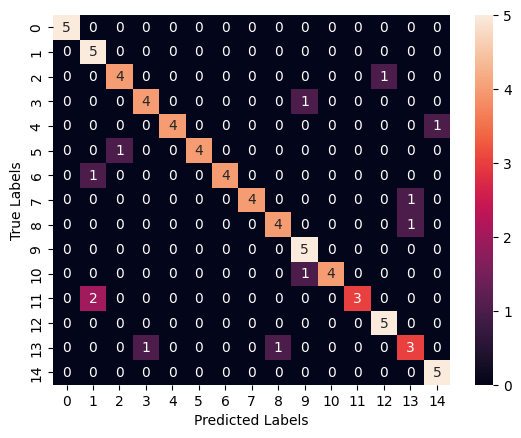

In [10]:
predictions_base = base_model.predict(X_test)
preds_base = [np.argmax(p) for p in predictions_base]
print(classification_report(y_test,preds_base,digits=3))
sns.heatmap(confusion_matrix(y_test, preds_base), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

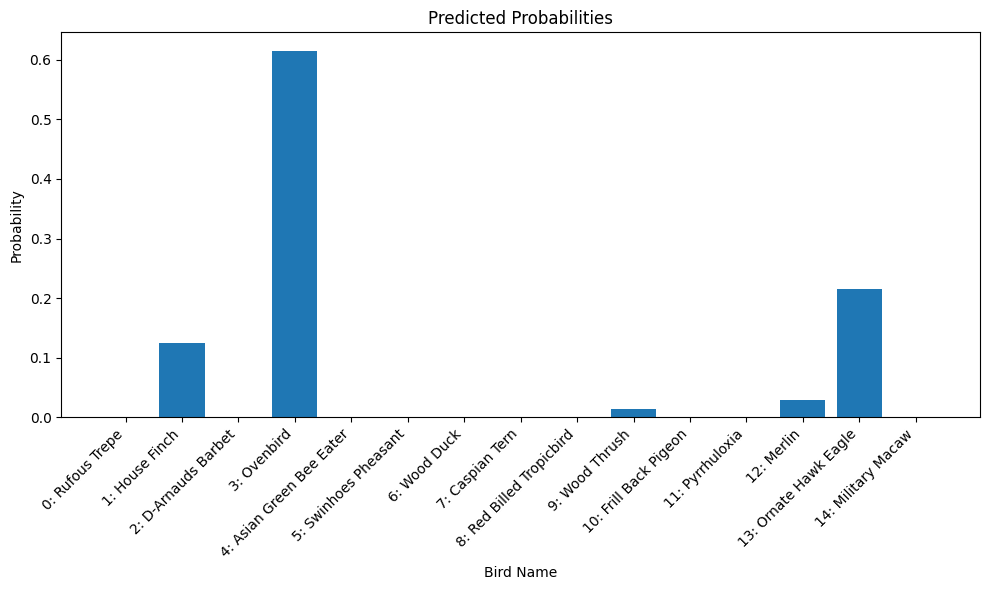

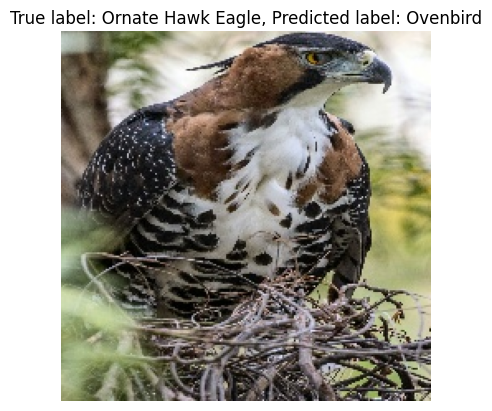

In [11]:
i = 66
#i = 55
predicted_probabilities_base = predictions_base[i]
probabilities_cnn(predicted_probabilities_base, preds_base)

## Augmented model

In [7]:
augmented_model = tf.keras.models.load_model('augmented_model.keras')

In [8]:
score_aug = augmented_model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_aug[0])
print("Test accuracy:", score_aug[1])

C:\Users\lotrh\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Test loss: 0.4988557994365692
Test accuracy: 0.9466666579246521


3/3 [==============================] - 1s 123ms/step
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      0.833     1.000     0.909         5
           2      0.833     1.000     0.909         5
           3      1.000     0.800     0.889         5
           4      1.000     1.000     1.000         5
           5      1.000     1.000     1.000         5
           6      1.000     1.000     1.000         5
           7      1.000     1.000     1.000         5
           8      1.000     1.000     1.000         5
           9      0.833     1.000     0.909         5
          10      1.000     1.000     1.000         5
          11      1.000     0.800     0.889         5
          12      0.750     0.600     0.667         5
          13      1.000     1.000     1.000         5
          14      1.000     1.000     1.000         5

    accuracy                          0.947        75
   macro avg      0.950    

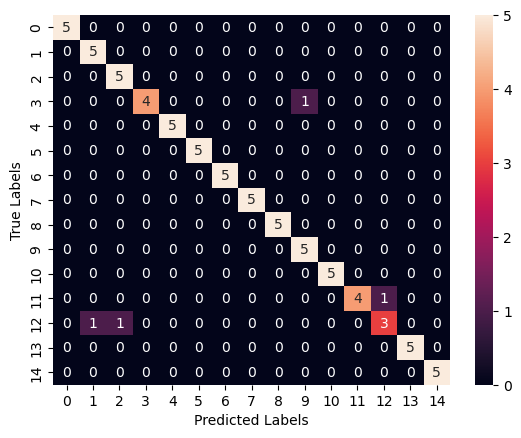

In [9]:
predictions_aug = augmented_model.predict(X_test)
preds_aug = [np.argmax(p) for p in predictions_aug]

print(classification_report(y_test,preds_aug,digits=3))
sns.heatmap(confusion_matrix(y_test, preds_aug), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

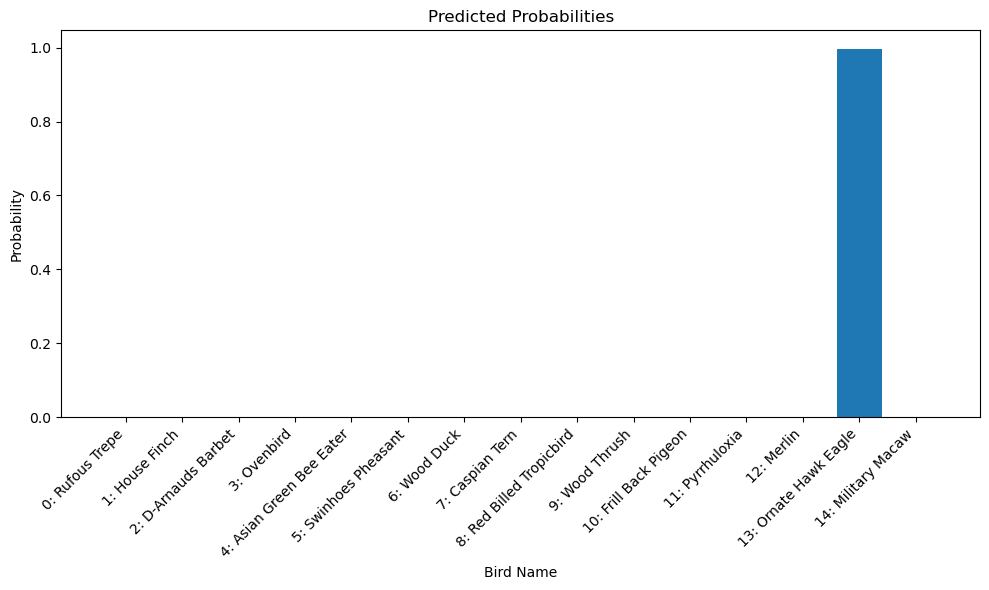

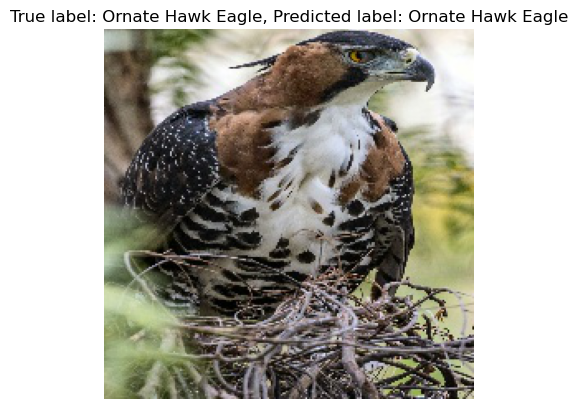

In [10]:
i=66
predicted_probabilities_aug = predictions_aug[i]
probabilities_cnn(predicted_probabilities_aug, preds_aug)

## Pretrained model
### VGG 16

In [12]:
model_vgg = tf.keras.models.load_model('model_vgg.keras')

In [13]:
score_vgg = model_vgg.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_vgg[0])
print("Test accuracy:", score_vgg[1])

Test loss: 0.15169647336006165
Test accuracy: 0.9599999785423279


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 899ms/step
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000         5
           2      1.000     1.000     1.000         5
           3      1.000     1.000     1.000         5
           4      1.000     1.000     1.000         5
           5      1.000     0.800     0.889         5
           6      0.833     1.000     0.909         5
           7      1.000     1.000     1.000         5
           8      0.833     1.000     0.909         5
           9      1.000     1.000     1.000         5
          10      1.000     1.000     1.000         5
          11      1.000     0.600     0.750         5
          12      1.000     1.000     1.000         5
          13      0.833     1.000     0.909         5
          14      1.000     1.000     1.000         5

    accuracy                          0.960        75
   macro avg      0.967     0.960     0.9

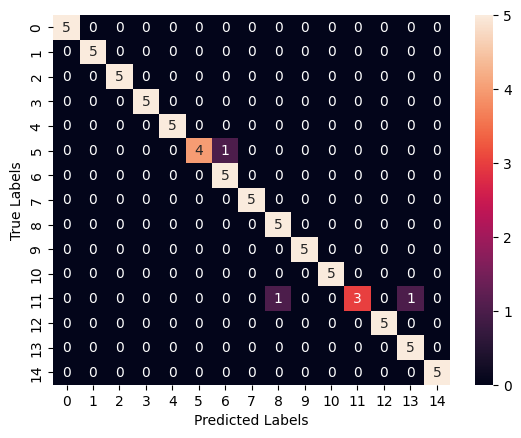

In [14]:
predictions_vgg = model_vgg.predict(X_test)
preds_vgg = [np.argmax(p) for p in predictions_vgg]

print(classification_report(y_test,preds_vgg,digits=3))
sns.heatmap(confusion_matrix(y_test, preds_vgg), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

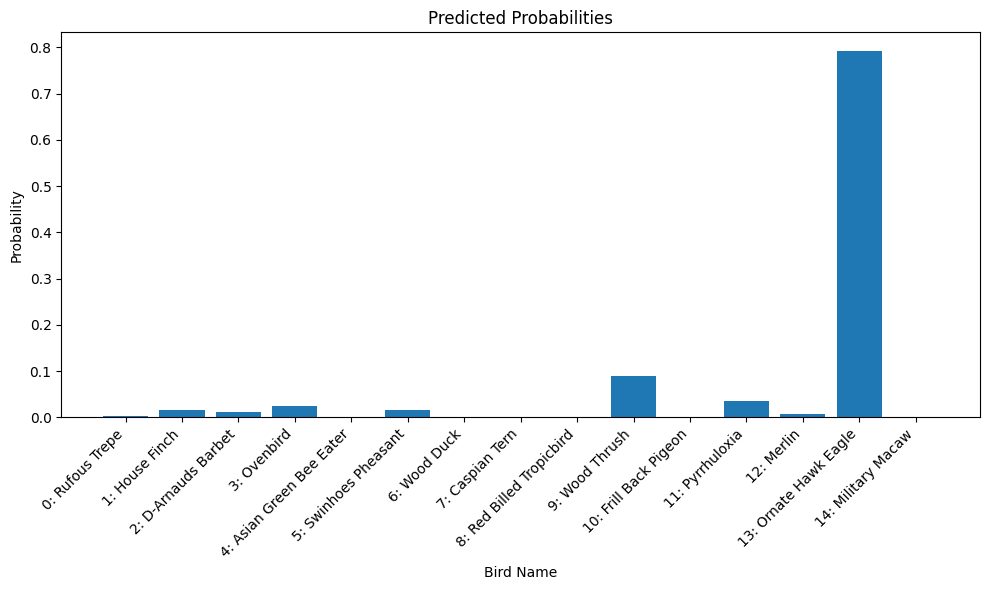

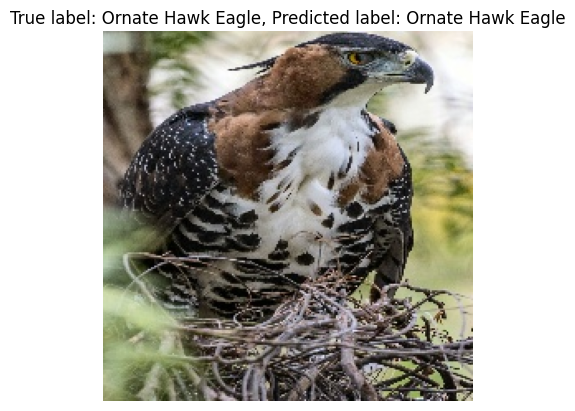

In [15]:
predicted_probabilities_vgg = predictions_vgg[i]
probabilities_cnn(predicted_probabilities_vgg, preds_vgg)

### InterceptV3

In [16]:
model_intV3 = tf.keras.models.load_model('model_interceptV3.keras')

In [17]:
score_intV3 = model_intV3.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_intV3[0])
print("Test accuracy:", score_intV3[1])

Test loss: 0.13204137980937958
Test accuracy: 0.9599999785423279


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E9A2AFBD80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step  
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      1.000     1.000     1.000         5
           2      1.000     1.000  

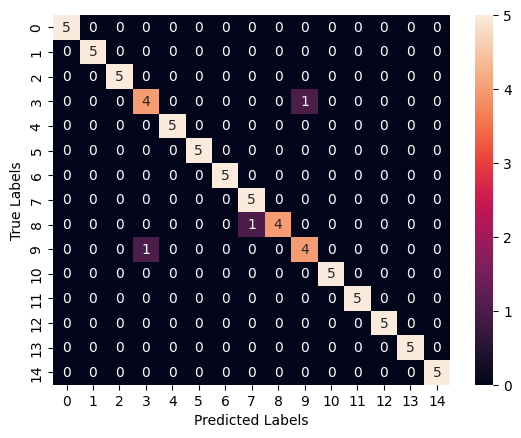

In [19]:
predictions_intV3 = model_intV3.predict(X_test)
preds_intV3 = [np.argmax(p) for p in predictions_intV3]

print(classification_report(y_test,preds_intV3,digits=3))
sns.heatmap(confusion_matrix(y_test, preds_intV3), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

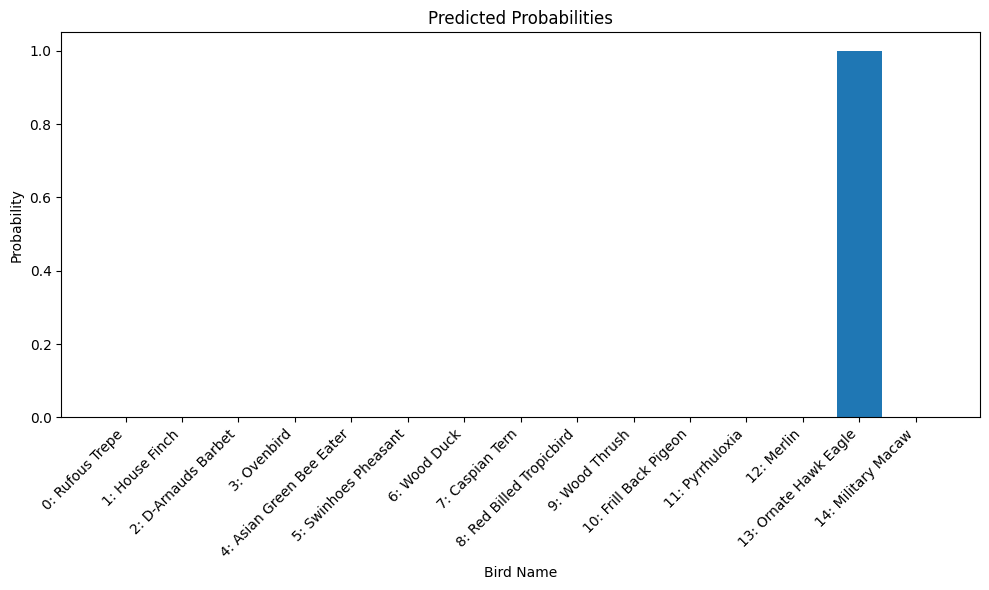

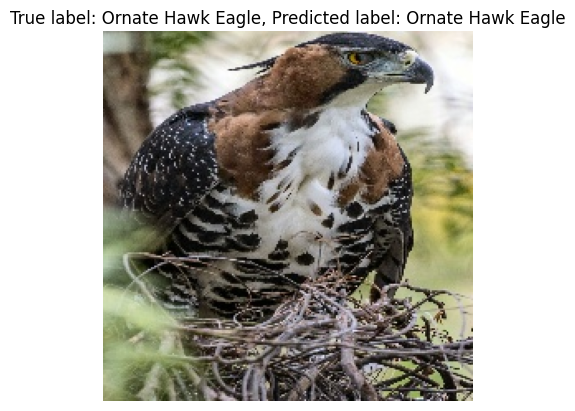

In [20]:
predicted_probabilities_intV3 = predictions_intV3[i]
probabilities_cnn(predicted_probabilities_intV3, preds_intV3)